# Imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import glob
from scipy.special import factorial

# File reading

In [4]:
def readDotFit(path):
    f1 = open(path, "r")

    #ignore everything until [result] line
    s = f1.readline()
    while "result" not in s:
        s = f1.readline()

    #because there is a space between the [ and the first number, lines can be processed using split(" ")
    channels = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    energy1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    ydata1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    yfit1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    bg1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)

    #extract gallium Ka area
    s = f1.readline()
    while "result.Ga Ka" not in s:
        s = f1.readline()

    #split line at spaces, get last element, convert to float
    ga_ka = float(f1.readline().split(" ")[-1])
    
    f1.close()

    return energy1, ydata1, yfit1, bg1, channels, ga_ka

In [5]:
#100 and 300 micro-amp data

dat_100 = {10:   readDotFit(glob.glob("20230712_CVD_3158_scantime/10s_report/*.fit")[0]),
           20:   readDotFit(glob.glob("20230712_CVD_3158_scantime/20s_report/*.fit")[0]),
           30:   readDotFit(glob.glob("20230712_CVD_3158_scantime/30s_report/*.fit")[0]),
           60:   readDotFit(glob.glob("20230712_CVD_3158_scantime/60s_report/*.fit")[0]),
           120:  readDotFit(glob.glob("20230712_CVD_3158_scantime/2m_report/*.fit")[0]),
           300:  readDotFit(glob.glob("20230712_CVD_3158_scantime/5m_report/*.fit")[0]),
           600:  readDotFit(glob.glob("20230712_CVD_3158_scantime/10m_report/*.fit")[0]),
           1200: readDotFit(glob.glob("20230712_CVD_3158_scantime/20m_report/*.fit")[0]),
           1800: readDotFit(glob.glob("20230712_CVD_3158_scantime/30m_report/*.fit")[0]),
           3600: readDotFit(glob.glob("20230712_CVD_3158_scantime/60m_report/*.fit")[0])}

dat_300 = {10:   readDotFit(glob.glob("20230711_CVD_3158_scantime/10s_report/*.fit")[0]),
           20:   readDotFit(glob.glob("20230711_CVD_3158_scantime/20s_report/*.fit")[0]),
           30:   readDotFit(glob.glob("20230711_CVD_3158_scantime/30s_report/*.fit")[0]),
           60:   readDotFit(glob.glob("20230711_CVD_3158_scantime/60s_report/*.fit")[0]),
           120:  readDotFit(glob.glob("20230711_CVD_3158_scantime/2m_report/*.fit")[0]),
           300:  readDotFit(glob.glob("20230711_CVD_3158_scantime/5m_report/*.fit")[0]),
           600:  readDotFit(glob.glob("20230711_CVD_3158_scantime/10m_report/*.fit")[0]),
           1200: readDotFit(glob.glob("20230711_CVD_3158_scantime/20m_report/*.fit")[0]),
           1800: readDotFit(glob.glob("20230711_CVD_3158_scantime/30m_report/*.fit")[0]),
           3600: readDotFit(glob.glob("20230711_CVD_3158_scantime/60m_report/*.fit")[0])}

#channel of data at index [0]
#want to use data from channels 510 to 597, which is a region with consistent noise amplitude
#weak Ca Kb peak at around 500
fc = int(dat_100[10][4][0])

keys = np.array(list(dat_100))

# Plotting

## Raw plots

### 100 microamp data

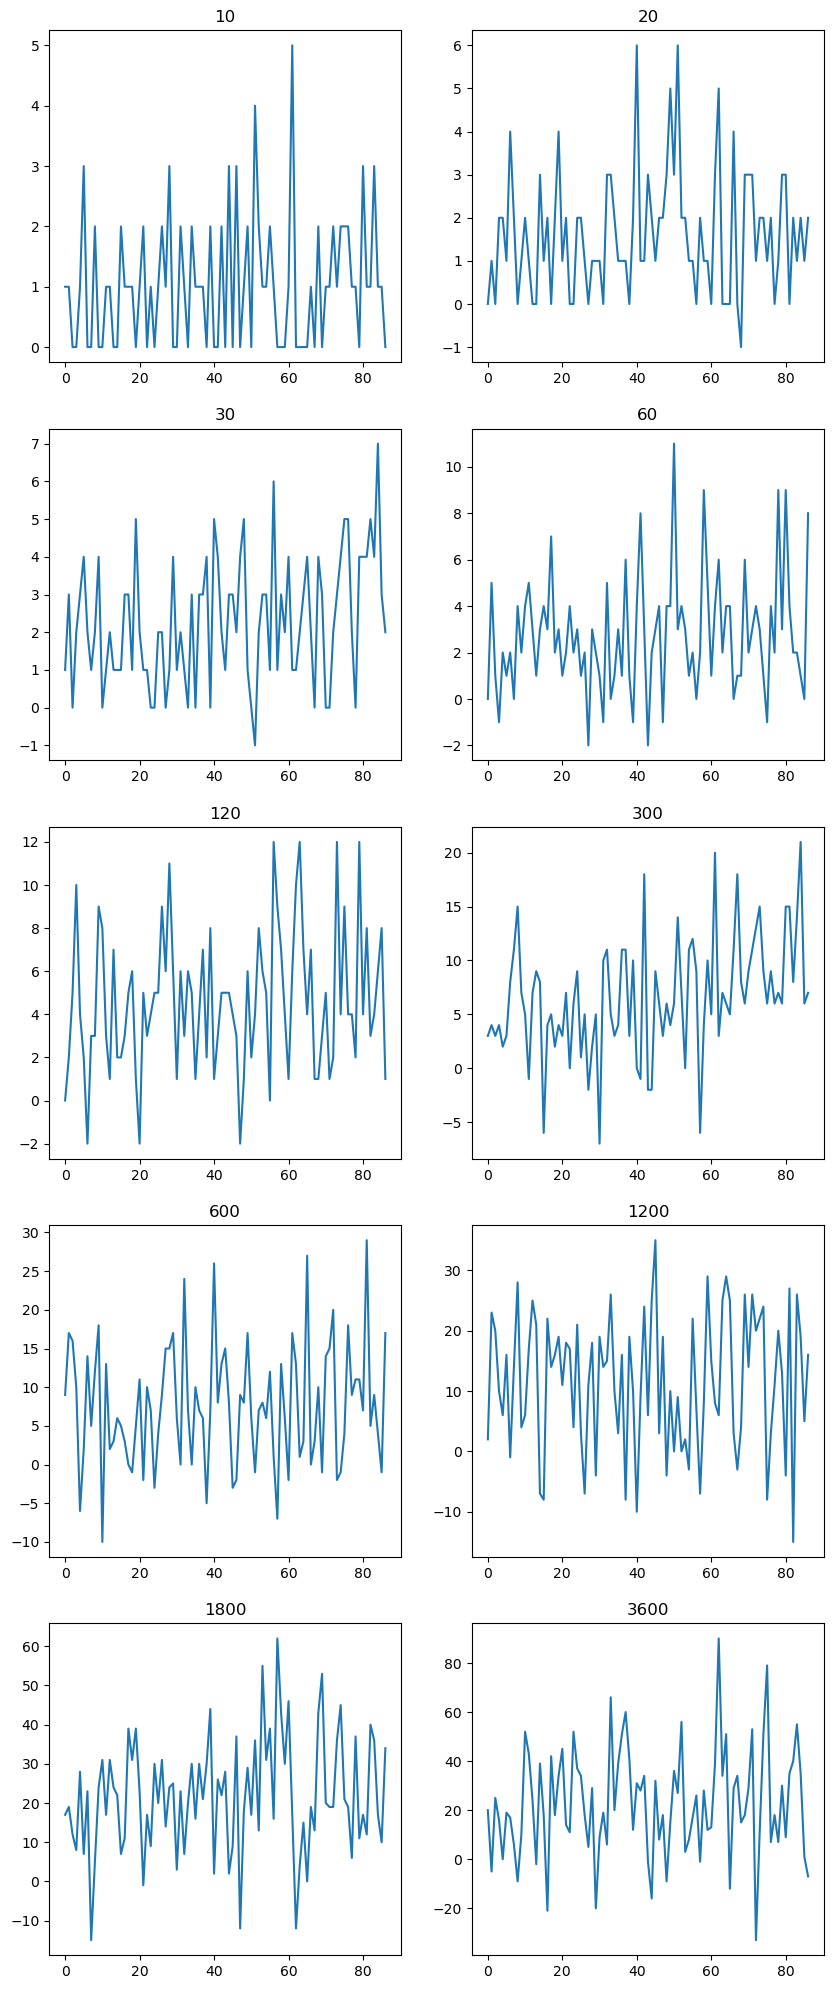

In [12]:
f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs = axs.reshape(10)

for i in range(0, axs.size):
    #round to nearest int
    axs[i].plot(np.rint(dat_100[keys[i]][1][510-fc:597-fc] - dat_100[keys[i]][3][510-fc:597-fc]), "-")
    axs[i].set_title(str(keys[i]))

plt.show()

### 300 microamp data

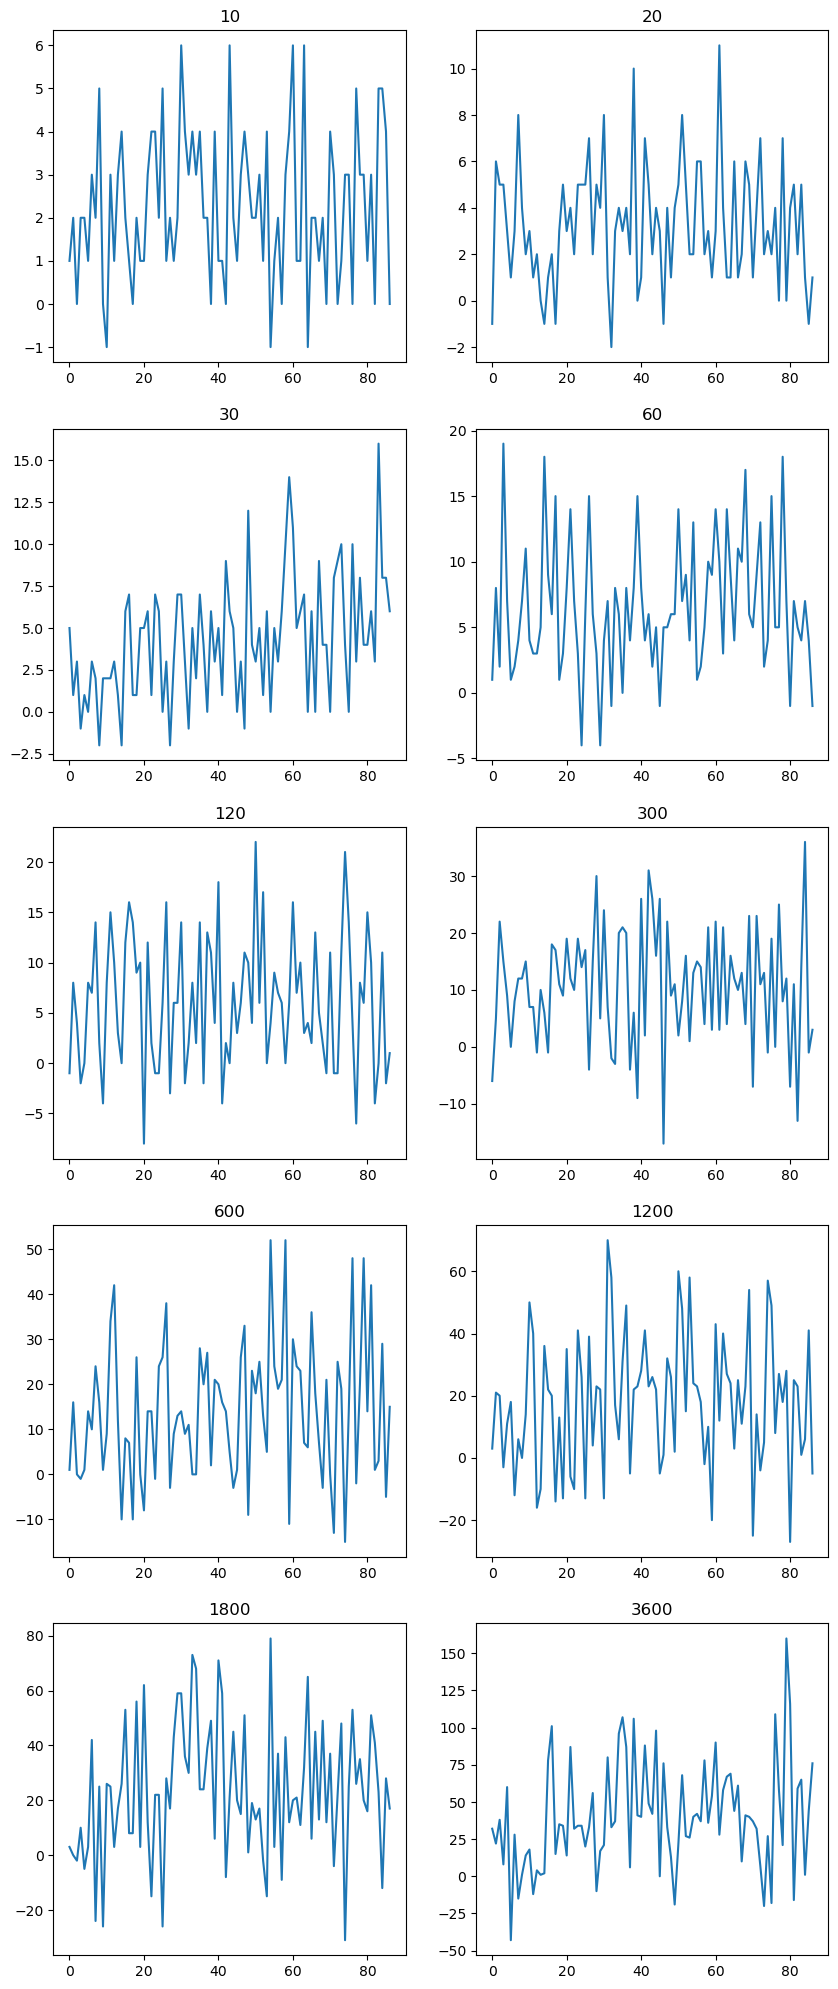

In [13]:
f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs = axs.reshape(10)

for i in range(0, axs.size):
    #round to nearest int
    axs[i].plot(np.rint(dat_300[keys[i]][1][510-fc:597-fc] - dat_300[keys[i]][3][510-fc:597-fc]), "-")
    axs[i].set_title(str(keys[i]))

plt.show()

## Histograms

## Poisson probability plots

### 100 microamp data

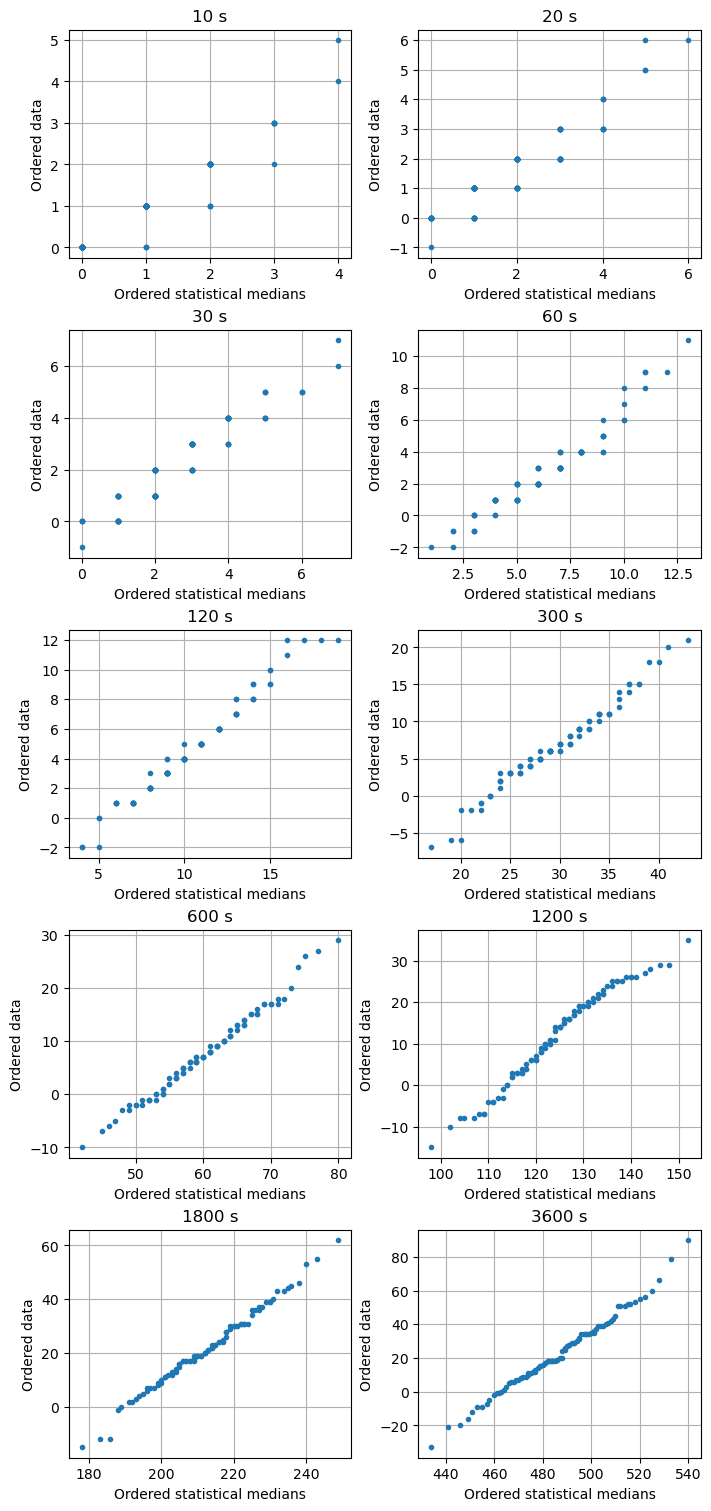

In [6]:
def probPlot(ax, dat, title):
    
    osm, osr = stats.probplot(dat, (np.std(dat)**2), dist=stats.poisson, fit=False)
    ax.plot(osm, osr, ".") #plot data
    #ax.plot(osm, osm, "-") #plot line y=x
    ax.grid(True)
    ax.ticklabel_format(scilimits=(-5,5))
    ax.set_title(title)
    ax.set_xlabel("Ordered statistical medians")
    ax.set_ylabel("Ordered data")

f, axs = plt.subplots(nrows=5, ncols=2, figsize=(7, 15), layout="constrained")

axs = axs.reshape(10)

for i in range(0, axs.size):
    probPlot(axs[i], np.rint(dat_100[keys[i]][1][510-fc:597-fc] - dat_100[keys[i]][3][510-fc:597-fc]), str(keys[i])+" s")

plt.show()

### 300 microamp data

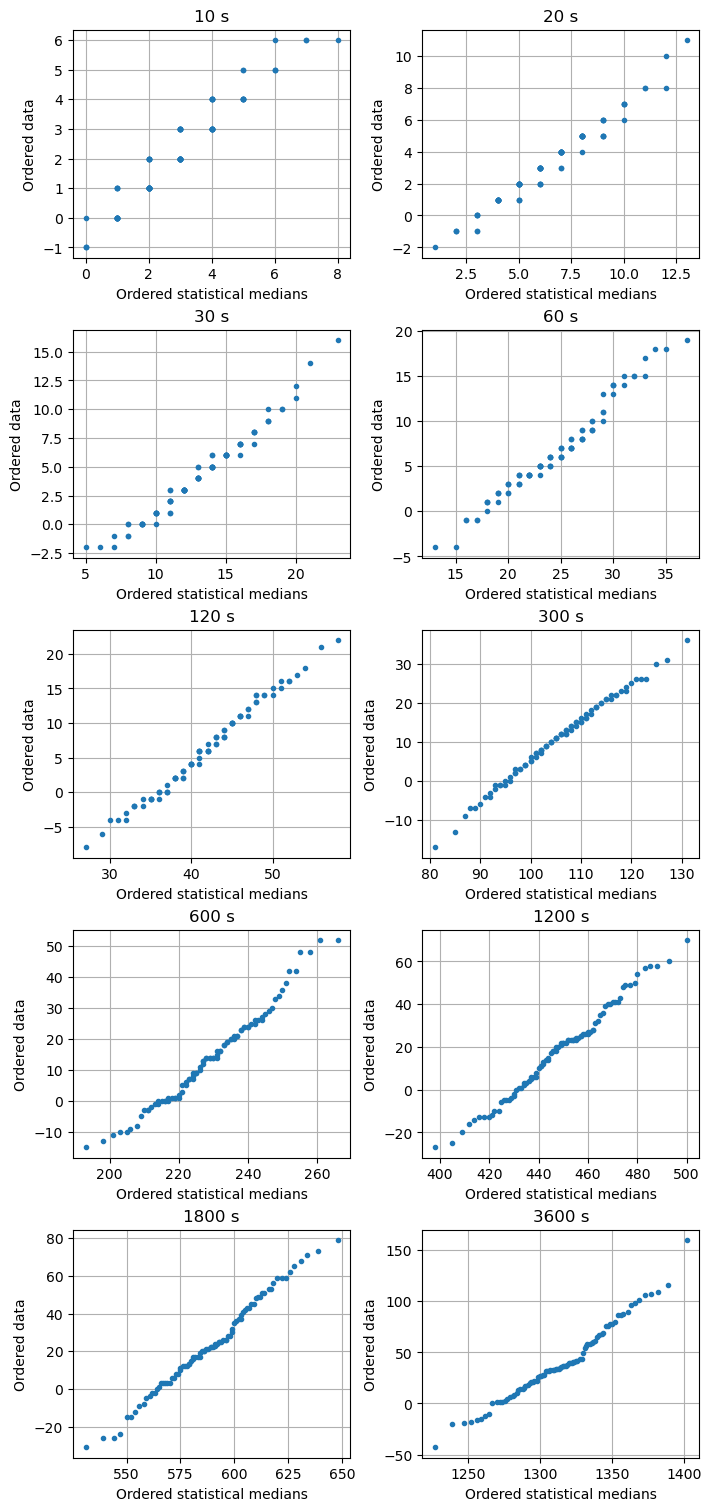

In [7]:
f, axs = plt.subplots(nrows=5, ncols=2, figsize=(7, 15), layout="constrained")

axs = axs.reshape(10)

for i in range(0, axs.size):
    probPlot(axs[i], np.rint(dat_300[keys[i]][1][510-fc:597-fc] - dat_300[keys[i]][3][510-fc:597-fc]), str(keys[i])+" s")

plt.show()

## Plot variance vs measurement time

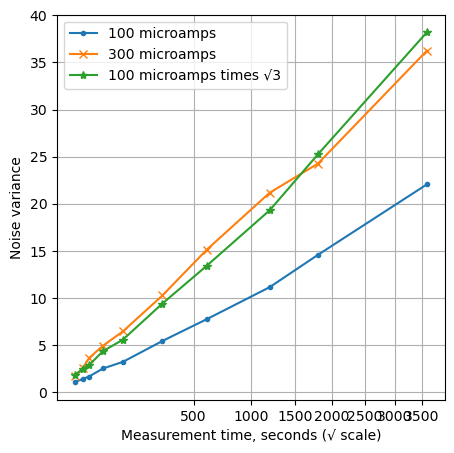

In [11]:
f, ax = plt.subplots(figsize=(5, 5))

stds_100=[]
stds_300=[]

for i in keys:
    stds_100.append(np.std(np.rint(dat_100[i][1][510-fc:597-fc] - dat_100[i][3][510-fc:597-fc])))
    stds_300.append(np.std(np.rint(dat_300[i][1][510-fc:597-fc] - dat_300[i][3][510-fc:597-fc])))

stds_100 = np.array(stds_100)
stds_300 = np.array(stds_300)

ax.plot(keys, stds_100, ".-", label="100 microamps")
ax.plot(keys, stds_300, "x-", label="300 microamps")
ax.plot(keys, stds_100*np.sqrt(3), "*-", label="100 microamps times \u221a3")

ax.legend()
ax.set_xscale("function", functions=(np.sqrt, lambda x: x*x))

ax.set_xlabel("Measurement time, seconds (\u221a scale)")
ax.set_ylabel("Noise variance")

ax.grid(True)

plt.show()

## Plot gallium Ka peak intensity vs measurement time

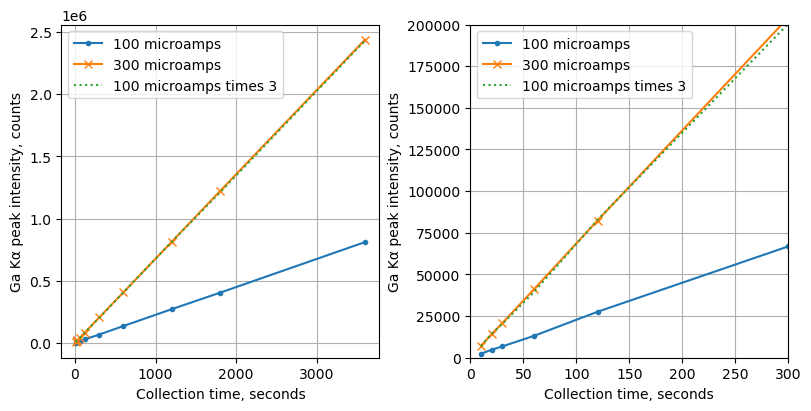

In [9]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4), layout="constrained")

for ax in axs:
    ax.plot(keys, [dat_100[i][5] for i in keys], ".-", label="100 microamps")
    ax.plot(keys, [dat_300[i][5] for i in keys], "x-", label="300 microamps")
    ax.plot(keys, [dat_100[i][5]*3 for i in keys], ":", label="100 microamps times 3")
    ax.grid(True)
    ax.set_xlabel("Collection time, seconds")
    ax.set_ylabel("Ga K\u03b1 peak intensity, counts")
    ax.legend()

axs[1].axis([0, 300, 0, 200000])

plt.show()